In [1]:
# Importing libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing datasets
pvs1_gps_mpu_left_filepath = r"archive/PVS 1/dataset_gps_mpu_left.csv"
pvs1_gps_mpu_right_filepath = r"archive/PVS 1/dataset_gps_mpu_right.csv"

pvs1_gps_mpu_left = pd.read_csv(pvs1_gps_mpu_left_filepath)
pvs1_gps_mpu_right = pd.read_csv(pvs1_gps_mpu_left_filepath)

In [3]:
# Concatenate the left and right sensor dataframes
pvs1 = pd.concat([pvs1_gps_mpu_left, pvs1_gps_mpu_right], axis=1)

# Rename columns to distinguish between left and right sensor data
pvs1.columns = [
    'timestamp', 'acc_x_dashboard_l', 'acc_y_dashboard_l', 'acc_z_dashboard_l',
    'acc_x_above_suspension_l', 'acc_y_above_suspension_l', 'acc_z_above_suspension_l', 
    'acc_x_below_suspension_l', 'acc_y_below_suspension_l', 'acc_z_below_suspension_l', 
    'gyro_x_dashboard_l', 'gyro_y_dashboard_l', 'gyro_z_dashboard_l', 'gyro_x_above_suspension_l', 
    'gyro_y_above_suspension_l', 'gyro_z_above_suspension_l', 'gyro_x_below_suspension_l', 
    'gyro_y_below_suspension_l', 'gyro_z_below_suspension_l', 'mag_x_dashboard_l', 'mag_y_dashboard_l', 
    'mag_z_dashboard_l', 'mag_x_above_suspension_l', 'mag_y_above_suspension_l', 'mag_z_above_suspension_l', 
    'temp_dashboard_l', 'temp_above_suspension_l', 'temp_below_suspension_l', 'timestamp_gps', 
    'latitude', 'longitude', 'speed', 'timestamp', 'acc_x_dashboard_r', 'acc_y_dashboard_r', 
    'acc_z_dashboard_r', 'acc_x_above_suspension_r', 'acc_y_above_suspension_r', 
    'acc_z_above_suspension_r', 'acc_x_below_suspension_r', 'acc_y_below_suspension_r', 
    'acc_z_below_suspension_r', 'gyro_x_dashboard_r', 'gyro_y_dashboard_r', 'gyro_z_dashboard_r', 
    'gyro_x_above_suspension_r', 'gyro_y_above_suspension_r', 'gyro_z_above_suspension_r', 
    'gyro_x_below_suspension_r', 'gyro_y_below_suspension_r', 'gyro_z_below_suspension_r', 
    'mag_x_dashboard_r', 'mag_y_dashboard_r', 'mag_z_dashboard_r', 'mag_x_above_suspension_r', 
    'mag_y_above_suspension_r', 'mag_z_above_suspension_r', 'temp_dashboard_r', 'temp_above_suspension_r', 
    'temp_below_suspension_r', 'timestamp_gps', 'latitude', 'longitude', 'speed'
]

# Remove duplicate columns (those with the same name, e.g., 'timestamp_gps', 'latitude', etc.)
pvs1_removed = pvs1.loc[:, ~pvs1.columns.duplicated()]

# Check the resulting dataframe
pvs1_removed.head()

,timestamp,acc_x_dashboard_l,acc_y_dashboard_l,acc_z_dashboard_l,acc_x_above_suspension_l,acc_y_above_suspension_l,acc_z_above_suspension_l,acc_x_below_suspension_l,acc_y_below_suspension_l,acc_z_below_suspension_l,...,gyro_z_below_suspension_r,mag_x_dashboard_r,mag_y_dashboard_r,mag_z_dashboard_r,mag_x_above_suspension_r,mag_y_above_suspension_r,mag_z_above_suspension_r,temp_dashboard_r,temp_above_suspension_r,temp_below_suspension_r
0,1.577219e+09,0.365116,0.167893,9.793961,0.327626,0.172733,9.781861,0.024797,0.172611,9.793824,...,-0.078110,22.878922,-6.040509,1.767874,75.340967,-7.537556,-0.334800,35.065355,33.340132,31.782640
1,1.577219e+09,0.392649,0.176273,9.771216,0.381496,0.189492,9.699261,0.024797,0.194158,9.842905,...,0.150771,22.878922,-5.854647,2.089306,75.300243,-6.469241,-5.222873,34.993471,33.172402,31.782640
2,1.577219e+09,0.409408,0.181062,9.732909,0.283333,0.182310,9.807000,0.003249,0.227677,9.888395,...,0.028701,23.434686,-4.181891,0.642863,75.463140,-7.893661,-4.687194,34.993471,33.412017,31.926408
3,1.577219e+09,0.371101,0.164302,9.749668,0.314458,0.230194,9.739963,0.005643,0.172611,9.871635,...,0.059219,23.990449,-5.482924,1.125011,75.463140,-7.893661,-4.687194,34.969509,33.220325,31.926408
4,1.577219e+09,0.390255,0.159514,9.869378,0.344385,0.202660,9.762708,0.005643,0.200144,9.860862,...,0.013442,22.693668,-6.040509,1.928590,74.933726,-8.012363,-4.084555,34.945548,33.220325,31.830563


In [4]:
#define a correlation matrix 

#keep only numeric values 
numeric_df = pvs1_removed.select_dtypes(include=['number'])

#print(numeric_df.columns)
correlation_matrix=numeric_df.corr()

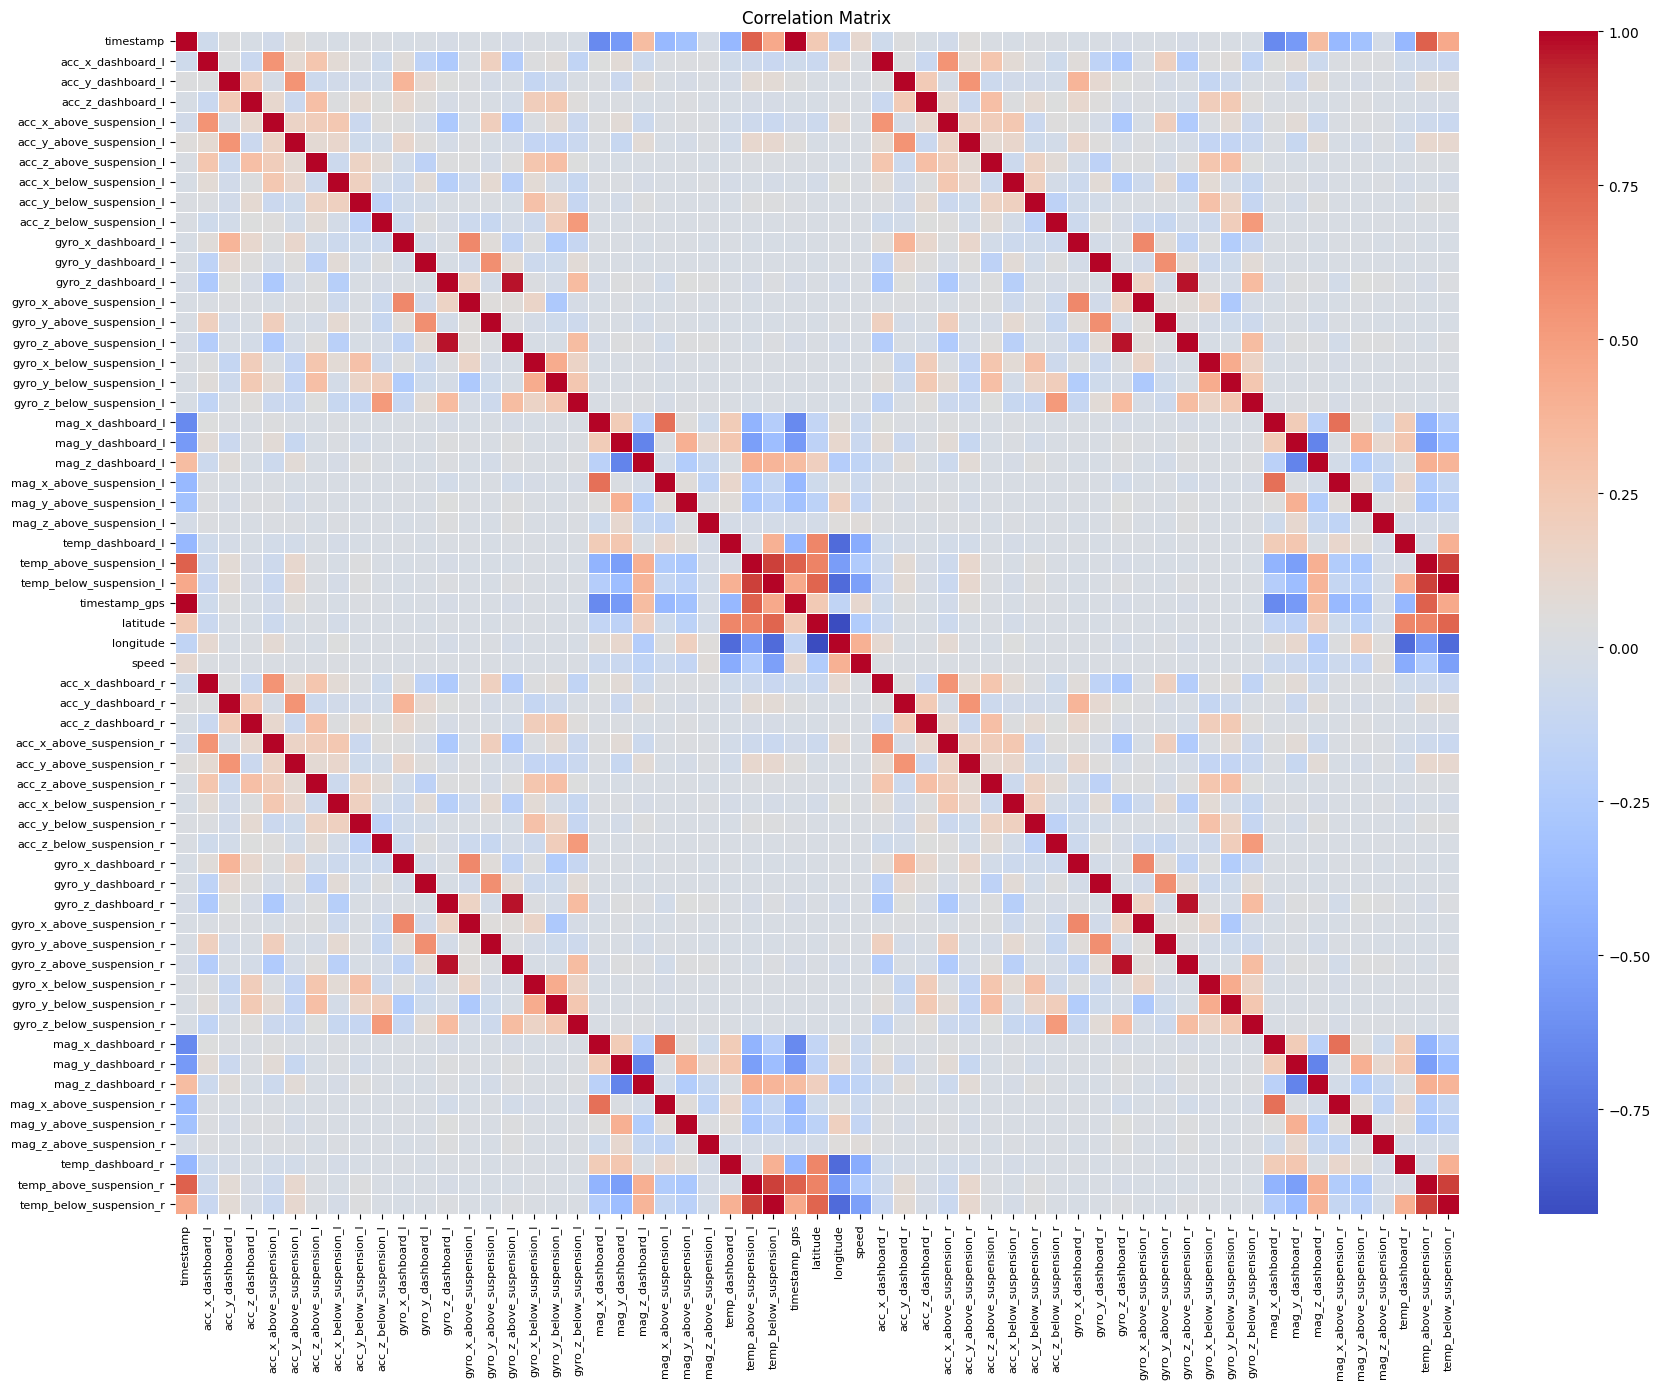

In [5]:
# Create the heatmap
plt.figure(figsize=(18, 14))  # Increase the size of the figure

# Plot the heatmap with adjusted figure size
sns.heatmap(correlation_matrix, annot=False, fmt='.2f', cmap='coolwarm', linewidths=0.5)

# Rotate the tick labels for better readability and shrink font size
plt.xticks(rotation=90, fontsize=8)  # Rotate x-axis labels by 90 degrees and adjust font size
plt.yticks(rotation=0, fontsize=8)   # Keep y-axis labels horizontal and adjust font size

# Add a title with smaller font size
plt.title("Correlation Matrix", fontsize=12)

# Show the plot with a tight layout
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

# REMOVE HIGHLY CORRELATED FEATURES 


In [ ]:
#take the absolute values of the correlation matrix
threshold=0.9

#take absoulute values
corr_matrix_abs=correlation_matrix.abs()

#take only upper diagonal 
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

highly_correlated_features=np.where(correlation_matrix*mask>threshold)

#print and store highly correlated features

to_drop=[]
for i,j in zip(*highly_correlated_features):
    #print( f"highly correlated pair: {corr_matrix_abs.columns[i]}-{corr_matrix_abs.columns[j]},(correlation: {corr_matrix_abs.iloc[i, j]:.2f})")
    to_drop.append(corr_matrix_abs.columns[j])

#remove to_drop columns
cleaned_pvs1=pvs1_removed.drop(columns=to_drop)
#print(f"droopped columns {to_drop}")
print(f"removed {len(to_drop)} columns")
print(f"new dataframe has shape {cleaned_pvs1.shape}")

removed 32 columns
new dataframe has shape (144036, 30)


: 

In [17]:
cleaned_pvs1.columns

Index(['timestamp', 'acc_x_dashboard_l', 'acc_y_dashboard_l',
       'acc_z_dashboard_l', 'acc_x_above_suspension_l',
       'acc_y_above_suspension_l', 'acc_z_above_suspension_l',
       'acc_x_below_suspension_l', 'acc_y_below_suspension_l',
       'acc_z_below_suspension_l', 'gyro_x_dashboard_l', 'gyro_y_dashboard_l',
       'gyro_z_dashboard_l', 'gyro_y_above_suspension_l',
       'gyro_x_below_suspension_l', 'gyro_y_below_suspension_l',
       'gyro_z_below_suspension_l', 'mag_x_dashboard_l', 'mag_y_dashboard_l',
       'mag_z_dashboard_l', 'mag_y_above_suspension_l',
       'mag_z_above_suspension_l', 'temp_dashboard_l', 'longitude', 'speed'],
      dtype='object')

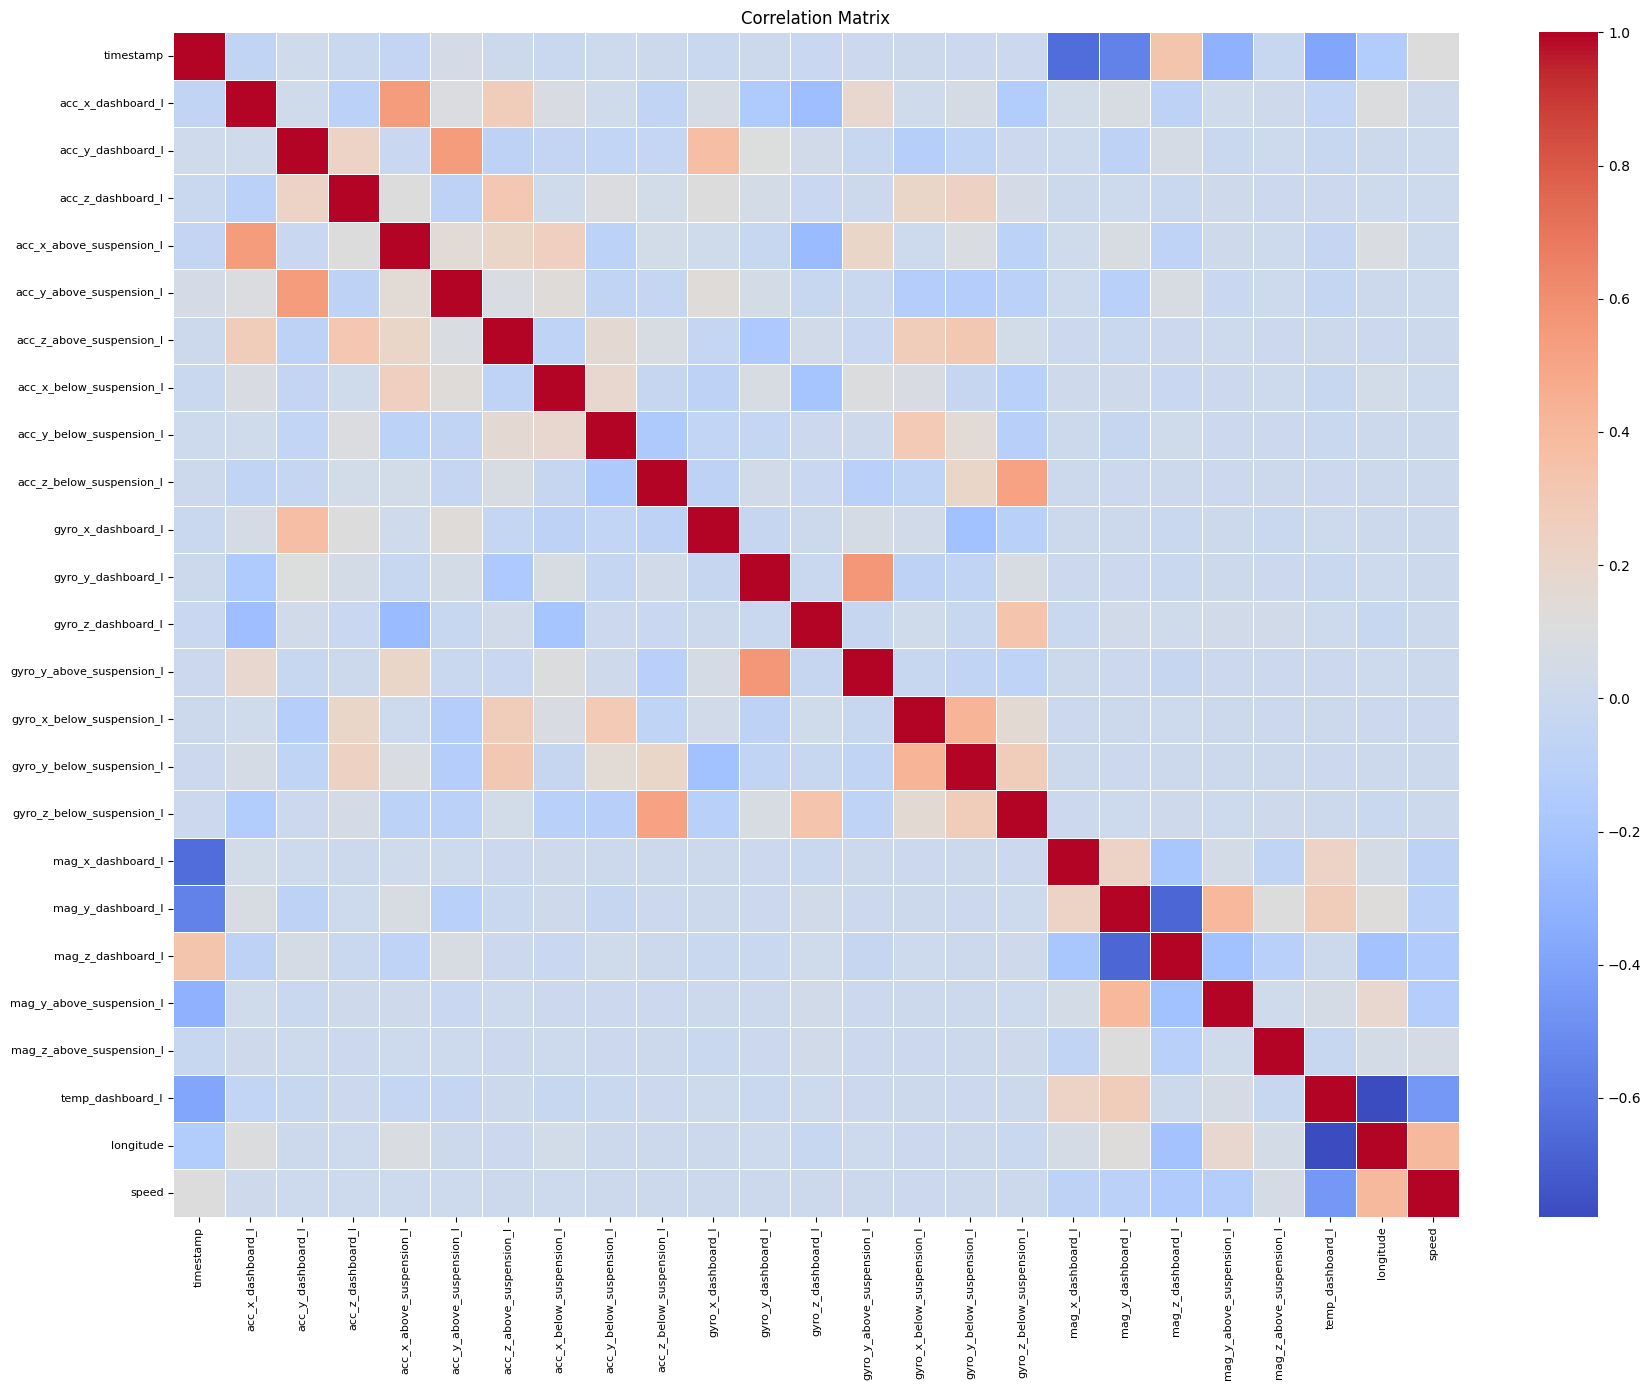

In [18]:
#check again correlation matrix

new_corr_matrix=cleaned_pvs1.corr()
# Create the heatmap
plt.figure(figsize=(18, 14))  # Increase the size of the figure

# Plot the heatmap with adjusted figure size
sns.heatmap(new_corr_matrix, annot=False, fmt='.2f', cmap='coolwarm', linewidths=0.5)

# Rotate the tick labels for better readability and shrink font size
plt.xticks(rotation=90, fontsize=8)  # Rotate x-axis labels by 90 degrees and adjust font size
plt.yticks(rotation=0, fontsize=8)   # Keep y-axis labels horizontal and adjust font size

# Add a title with smaller font size
plt.title("Correlation Matrix", fontsize=12)

# Show the plot with a tight layout
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


# DEFINE A WINDOW 

Now that we have selected our features, we might think of creating a sliding window for capturing trend data ecc...
for doing so, we need to compute some metrics inside our window that could be : 
1- BASIC METRICS : mean, STD, max, min
2- jerk ( useful for acceleration) which is computed as: $\delta(acceleration)/\delta(time)$. this can be really useful for understanding if the person had a nervous drive.

In [21]:
#let's define a window
def computeWindow(df, windowSize=100):

    #define empty dataframe  
    windowed_df=pd.DataFrame()

    #define starting and ending index
    for start_idx in range(len(df)-windowSize+1):
        end_idx=start_idx+windowSize

        #extract rows belonging to the window
        window=df.iloc[start_idx:end_idx]

        #take beginning timestamp and ending timestamp
        start_timestamp=window.iloc[0,0]
        end_timestamp=window.iloc[-1,0]

        
        #keep only sensor data
        sensor_data_window=window.iloc[:,1:]

        #compute metrics for the specific window
        max_values=window.max()
        min_values=window.min()
        mean_values=window.mean()
        std_values=window.std()
        jerk_values=(sensor_data_window.iloc[-1]-sensor_data_window.iloc[0])/(end_timestamp-start_timestamp)

        #concate them (place side by side)
        new_row=pd.concat([max_values,min_values,mean_values,std_values,jerk_values])
        new_row = new_row.to_frame().T 

        windowed_df = pd.concat([windowed_df, new_row], ignore_index=True)

        if start_idx%10000==0:
            print(start_idx)
            
            
    return windowed_df
    

In [55]:
len(pvs1)


144036

In [22]:
pvs1_windowed=computeWindow(cleaned_pvs1)

0
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\bruker\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\bruker\AppData\Local\Temp\ipykernel_9884\312919428.py", line 1, in <module>
    pvs1_windowed=computeWindow(cleaned_pvs1)
  File "C:\Users\bruker\AppData\Local\Temp\ipykernel_9884\1556764289.py", line 33, in computeWindow
    windowed_df = pd.concat([windowed_df, new_row], ignore_index=True)
  File "c:\Users\bruker\venv\lib\site-packages\pandas\util\_decorators.py", line 311, in wrapper
    return func(*args, **kwargs)
  File "c:\Users\bruker\venv\lib\site-packages\pandas\core\reshape\concat.py", line 360, in concat
    return op.get_result()
  File "c:\Users\bruker\venv\lib\site-packages\pandas\core\reshape\concat.py", line 595, in get_result
    new_data = concatenate_managers(
  File "c:\Users\bruker\venv\lib\site-packages\pandas\core\internals\concat.py", line 231, in concat

In [12]:
len(pvs1_windowed)

0